## Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

# Summary
**Task : prediting nextday-rain with high accuracy**

**process: its pretty straight forward project,  <br>
 1.we do some preprocessing so data be ready for some analysing.<br>
 2.we analyse data to find some relation between features and target.<br>
 3.furthur preprocessing to make date ready for training.<br>
 4.we train the model and tune it for better accuracy<br>**

# 1.Loading dataset

In [2]:
df = pd.read_csv('../input/weather-dataset-rattle-package/weatherAUS.csv')

In [3]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


 - **there are 23 columns, 16 numerical and 7 categorical**
 - **there 22 feature column and 1 target column**
 - **there are a lot of missing datas in some columns**
 

# 2.Data preprocessing

### 2.1 removing null values

In [6]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

**We can see the "Evapration","Sunshine","Cloud9am" and "Cloud3pm" have a lot of missing values, we ignore them for now and drop other missing values.**

In [7]:
drop_columns = list(set(list(df.columns)) - set(["Evaporation","Sunshine","Cloud9am","Cloud3pm"]))

for column in drop_columns :
     df = df[df[column].notna()]


In [8]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No


**Now for "Evaporation","Sunshine","Cloud9am" and "Cloud3pm", since data was gathered from diffrent locations, there is a possibility that some stations couldnt provide this information, so its better check this possibility first.**

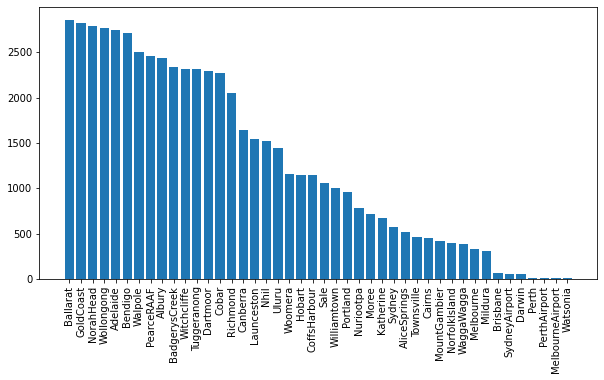

In [9]:
df_null= df[df.isnull().any(axis=1)]
dict_data = df_null['Location'].value_counts().to_dict()
plt.figure(figsize=(10,5)) 
plt.bar(list(dict_data.keys()),list(dict_data.values()))
plt.xticks(list(dict_data.keys()), rotation='vertical')
plt.show()


**No location has noticeably larager amount of missing data than the others, so the best thing to do is to drop the features**

In [10]:
df.drop(["Evaporation","Sunshine","Cloud9am","Cloud3pm"],axis=1,inplace=True)
df.isna().sum()
df

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,No,No
145455,2017-06-21,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No


### 2.2 removing the outliers

In [11]:
df_numeric = df.select_dtypes('float64')
df_numeric_z= df_numeric[(np.abs(stats.zscore(df_numeric)) < 3).all(axis=1)]
columns_to_drop = df.select_dtypes(include=np.number).columns.tolist()
df = df.drop(columns_to_drop,axis=1)


In [12]:
df[columns_to_drop] = df_numeric_z[columns_to_drop]
df = df.dropna()

In [13]:
df

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,2008-12-01,Albury,W,W,WNW,No,No,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8
1,2008-12-02,Albury,WNW,NNW,WSW,No,No,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3
2,2008-12-03,Albury,WSW,W,WSW,No,No,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2
3,2008-12-04,Albury,NE,SE,E,No,No,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5
4,2008-12-05,Albury,W,ENE,NW,No,No,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,E,ESE,E,No,No,3.5,21.8,0.0,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9
145455,2017-06-21,Uluru,E,SE,ENE,No,No,2.8,23.4,0.0,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4
145456,2017-06-22,Uluru,NNW,SE,N,No,No,3.6,25.3,0.0,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5
145457,2017-06-23,Uluru,N,SE,WNW,No,No,5.4,26.9,0.0,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1


**we will do more data processing for training the model, but first we should analyse the data**

# 3.Analysis

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

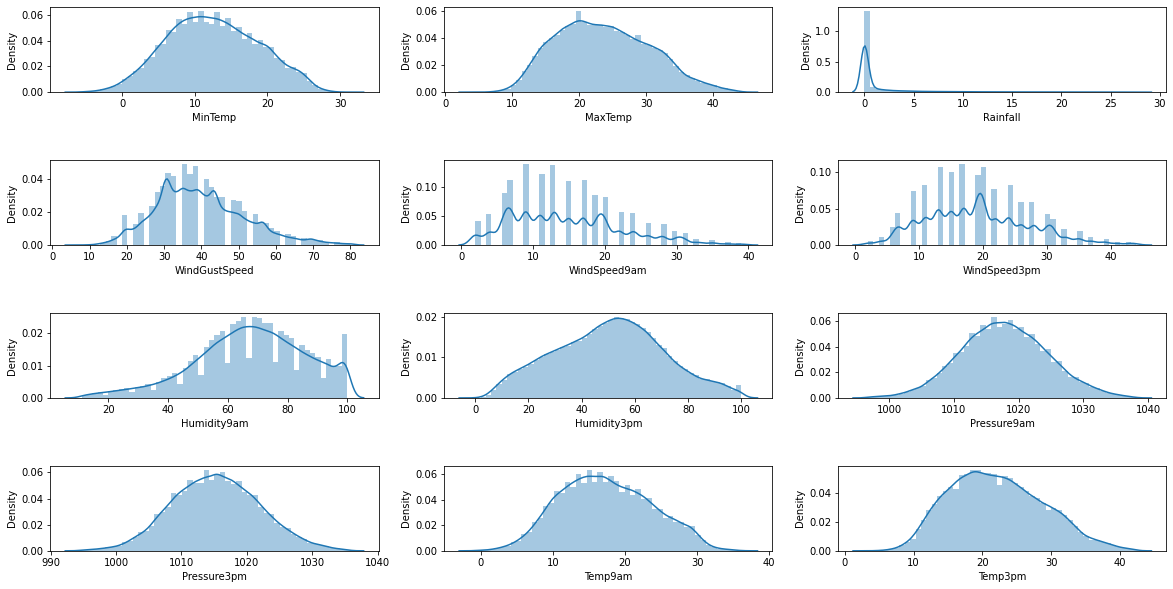

In [14]:

list_categorical_column = df.select_dtypes(include=np.number).columns.tolist()
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12)) = plt.subplots(4,3,figsize=(20,10)) 
ax_list = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12]
i = 0

for column in list_categorical_column:
    
    sns.distplot(df[column], ax=ax_list[i])
    i += 1
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.8)
plt.show()

**by comparing the distributions above with distribution of the days that it rained the next day, we can find some correlations between target and some features**

In [15]:
df_rain_tommorow = df.loc[df["RainTomorrow"] == "Yes"]

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

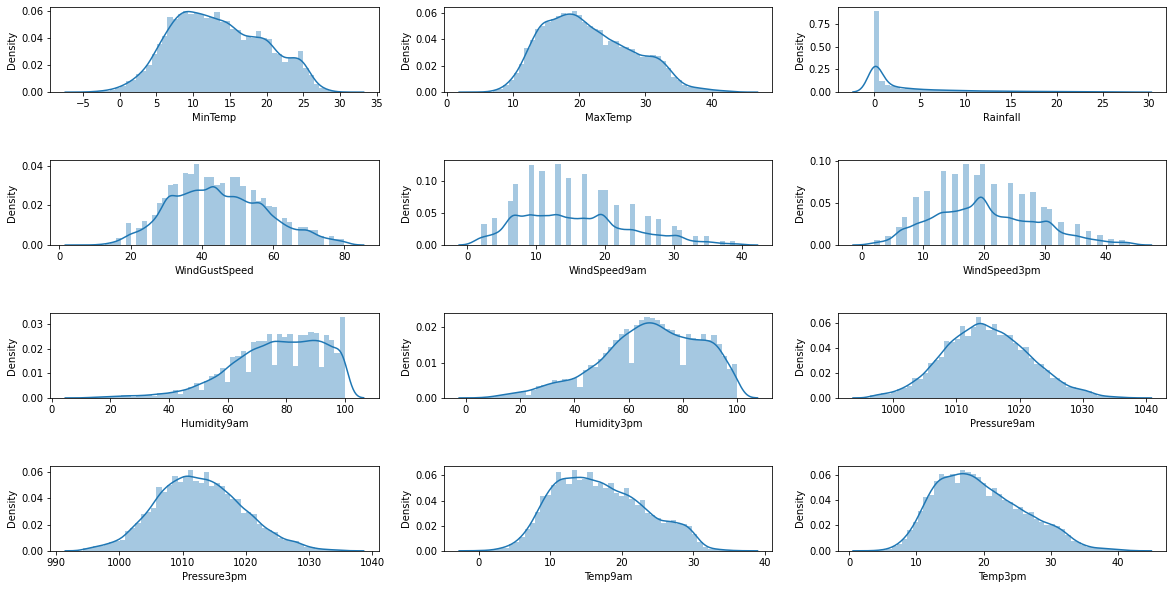

In [16]:
list_categorical_column = df.select_dtypes(include=np.number).columns.tolist()
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12)) = plt.subplots(4,3,figsize=(20,10)) 
ax_list = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12]
i = 0

for column in list_categorical_column:
    
    sns.distplot(df_rain_tommorow[column], ax=ax_list[i])
    i += 1
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.8)
plt.show()

**as you can see,in the days before rainy days, the data related to temperature has lower median and the humidty and the rain fall have higher median, but pressure and wind data doesnt seem to affect the probability of raining the next day**

In [17]:
df_rain_today = df.loc[df["RainToday"] == "Yes"]

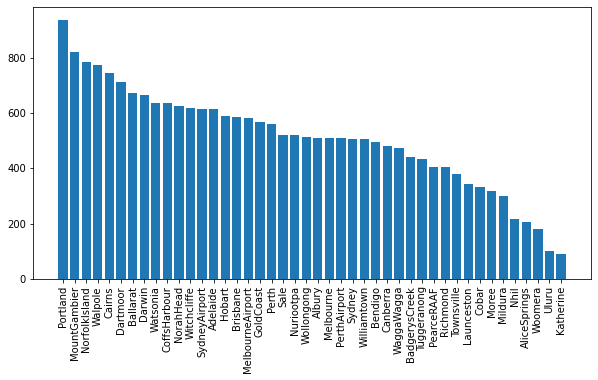

In [18]:

dict_data = df_rain_today['Location'].value_counts().to_dict()
plt.figure(figsize=(10,5)) 
plt.bar(list(dict_data.keys()),list(dict_data.values()))
plt.xticks(list(dict_data.keys()), rotation='vertical')
plt.show()

**the chart above shows the number of rainy days in each location**

In [19]:
df_numeric = df[df.select_dtypes(include=np.number).columns.tolist()]

<AxesSubplot:>

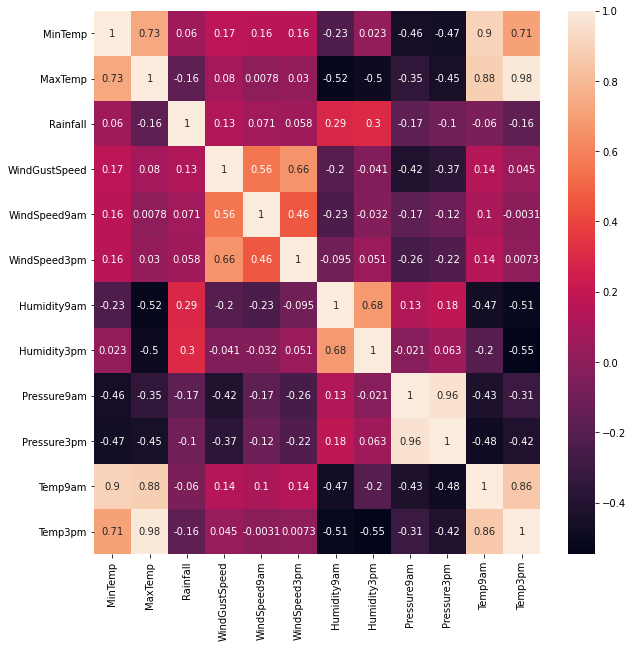

In [20]:
Var_Corr = df_numeric.corr()
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True,ax=ax)

**heatmap is showing some intresting correlation between numerical features**

# 4.Furthur preprocessing

### 4.1 One-Hot encoding

In [21]:

rain_tomorrow = df['RainTomorrow']
df = df.drop('RainTomorrow',axis=1)
df['RainTomorrow'] =rain_tomorrow
df_encoded = pd.get_dummies(df.iloc[:,:18],columns=['WindGustDir','WindDir9am','WindDir3pm'])
df_encoded['RainTomorrow'] =rain_tomorrow
df_encoded.drop('Date',axis=1,inplace=True)
df_encoded.drop('Location',axis=1,inplace=True)
df_encoded["RainToday"]= df_encoded["RainToday"].astype('category').cat.codes
df_encoded["RainTomorrow"]= df_encoded["RainTomorrow"].astype('category').cat.codes

### 4.2 normalization

In [22]:
x = df_encoded.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
columns = df_encoded.columns
df_encoded_normalized = pd.DataFrame(x_scaled)
df_encoded_normalized.columns = columns

**this step is not that important with algorithms we are using**

### 4.3 balancing target values

In [23]:
df_encoded_normalized['RainTomorrow'].value_counts()

0.0    85475
1.0    22393
Name: RainTomorrow, dtype: int64

In [24]:
df_training = df_encoded_normalized.groupby('RainTomorrow').apply(lambda x: x.sample(n=11000)).reset_index(drop = True)

In [25]:
df_training['RainTomorrow'].value_counts()

0.0    11000
1.0    11000
Name: RainTomorrow, dtype: int64

**this is an important step, if we dont do this model will try to predict false and will fail to predict true values.**

### 4.4 train,test split

In [26]:
X=df_training.iloc[:,:61]
y=df_training.iloc[:,61]

In [27]:
X_train , X_test_dummy , y_train , y_test_dummy = train_test_split(X,y , test_size=0.2, random_state=0)

**we shouldnt use "df_training" dataframe for testing, because in this dataframe number of target values have been euqalized.**

In [28]:
X=df_encoded_normalized.iloc[:,:61]
y=df_encoded_normalized.iloc[:,61]

In [29]:
X_train_dummy , X_test , y_train_dummy , y_test = train_test_split(X,y , test_size=0.2, random_state=0)

**insted we use non-eualized dataframe for testing so testing would be closer to real life.**

# 5.Training

### 5.1 initial training

#### 5.1.1 training with Logistic Regression

In [30]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print('report : \n',classification_report(y_test,y_pred))
print('\nmatrix :\n ',confusion_matrix(y_test,y_pred))
print('\nscore : ',accuracy_score(y_test,y_pred))

report : 
               precision    recall  f1-score   support

         0.0       0.93      0.80      0.86     17129
         1.0       0.49      0.76      0.60      4445

    accuracy                           0.79     21574
   macro avg       0.71      0.78      0.73     21574
weighted avg       0.84      0.79      0.80     21574


matrix :
  [[13679  3450]
 [ 1080  3365]]

score :  0.7900250301288588


#### 5.1.2 training with XGBoost

In [31]:
xgbc = XGBClassifier(objective='binary:logistic')
xgbc.fit(X_train,y_train)
y_pred = xgbc.predict(X_test)
print('report : \n',classification_report(y_test,y_pred))
print('\nmatrix :\n ',confusion_matrix(y_test,y_pred))
print('\nscore : ',accuracy_score(y_test,y_pred))

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:41:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
report : 
               precision    recall  f1-score   support

         0.0       0.95      0.81      0.87     17129
         1.0       0.53      0.82      0.64      4445

    accuracy                           0.81     21574
   macro avg       0.74      0.82      0.76     21574
weighted avg       0.86      0.81      0.83     21574


matrix :
  [[13912  3217]
 [  807  3638]]

score :  0.8134791879113749


#### 5.1.3 training with RandomForest

In [32]:
clf=RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('report :\n ',classification_report(y_test,y_pred))
print('\nmatrix :\n ',confusion_matrix(y_test,y_pred))
print('\nscore : ',accuracy_score(y_test,y_pred))

report :
                precision    recall  f1-score   support

         0.0       0.96      0.82      0.88     17129
         1.0       0.55      0.86      0.67      4445

    accuracy                           0.83     21574
   macro avg       0.76      0.84      0.78     21574
weighted avg       0.87      0.83      0.84     21574


matrix :
  [[14068  3061]
 [  643  3802]]

score :  0.8283118568647446


### 5.2 Tuning

**tuning threshold for F1**

Text(0.5, 0, 'Threshold')

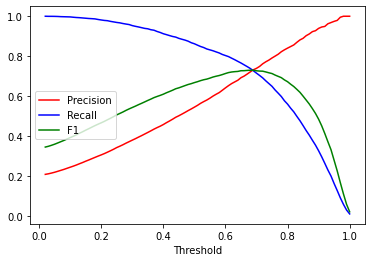

In [33]:
y_scores = clf.predict_proba(X_test)[:,1]
p, r, t = precision_recall_curve(y_test, y_scores)
f1 = 2*p[:-1]*r[:-1]/(r[:-1]+p[:-1])
plt.plot(t, p[:-1], 'r-', label='Precision')
plt.plot(t, r[:-1], 'b-', label='Recall')
plt.plot(t, f1, 'g-', label='F1')
plt.legend(loc='center left')
plt.xlabel('Threshold')



**this graph shows effect of threshold on F1,precision,recall. since we are looking for a high F1 score, is around 0.7 threshold**

In [34]:
y_pred = (clf.predict_proba(X_test)[:,1] >= 0.71).astype(int)
print('\nreport :\n ',classification_report(y_test,y_pred))
print('\nmatrix :\n ',confusion_matrix(y_test,y_pred))
print('\nscore : ',accuracy_score(y_test,y_pred))



report :
                precision    recall  f1-score   support

         0.0       0.92      0.94      0.93     17129
         1.0       0.75      0.70      0.73      4445

    accuracy                           0.89     21574
   macro avg       0.84      0.82      0.83     21574
weighted avg       0.89      0.89      0.89     21574


matrix :
  [[16080  1049]
 [ 1317  3128]]

score :  0.890330953926022


**this is the model with best accuracy while maintaining acceptable f1-score**

# 6.Conclusion

**dataset was fairly simple, nothing too tricky. we had to one-hot encode the categorical features and balance the target data. <br>
<br>
we built a classifier model with RandomForest, after some tweaking we achieved 0.89 "testing accuray" and maitaining 0.72 "f1" which 
considering the number of difftent locations, its not bad.**

**since data is location based, if we train the model on each location indivisually, we get much better accuracy**

